In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [1]:
# Problem statement
# iPrint being a cutting-edge company, is trying to solve this issue of revenue leakage by personalising user tastes 
# and introducing new content to its users at the start of the day on the home page of the application. 
# iPrint is planning to assess these recommendations by tracking whether the user clicks on those items or not. 
# Moreover, once the user clicks on any news item A, it wants to recommend news similar to the news A, at the bottom of the page of 
# the news item A. 
# Two data sets are available 
# 1. consumer_transactions
# 2. platform_content


# Consumer Transanctions analysis

In [3]:
# Read the conssumer transaction data
consuTrx = pd.read_csv("./data/consumer_transanctions.csv")

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
consuTrx.head(10)

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN
5,1465413742,content_watched,310515487419366995,-8763398617720485024,1395789369402380392,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR
6,1465415950,content_watched,-8864073373672512525,3609194402293569455,1143207167886864524,NaN,NaN,NaN
7,1465415066,content_watched,-1492913151930215984,4254153380739593270,8743229464706506141,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
8,1465413762,content_watched,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
9,1465413771,content_watched,3064370296170038610,3609194402293569455,1143207167886864524,NaN,NaN,NaN


In [5]:
consuTrx.describe()

,event_timestamp,item_id,consumer_id
count,7.231200e+04,7.231200e+04,7.231200e+04
mean,1.470103e+09,-3.033423e+16,1.252026e+16
std,7.258130e+06,5.344755e+18,5.022333e+18
min,1.457964e+09,-9.222795e+18,-9.223122e+18
25%,1.464876e+09,-4.726309e+18,-3.596627e+18
50%,1.468343e+09,1.893099e+16,-1.088422e+17
75%,1.474461e+09,4.441012e+18,3.766319e+18
max,1.488310e+09,9.222265e+18,9.210531e+18


In [6]:
consuTrx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72312 non-null  int64 
 1   interaction_type      72312 non-null  object
 2   item_id               72312 non-null  int64 
 3   consumer_id           72312 non-null  int64 
 4   consumer_session_id   72312 non-null  object
 5   consumer_device_info  56918 non-null  object
 6   consumer_location     56907 non-null  object
 7   country               56918 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [7]:
## % of non null in  consumer_device_info  
(1 - 56918 /72312 )*100


21.2883062285651

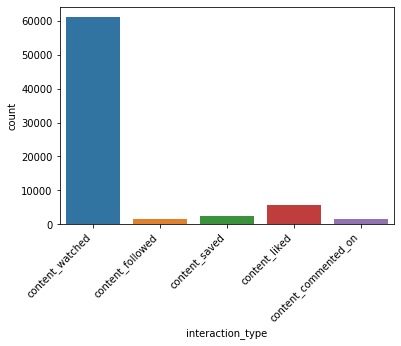

In [8]:
inxType  =  sns.countplot(x="interaction_type", data=consuTrx[['interaction_type']])
inxType.set_xticklabels(inxType.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

In [9]:
# Most of the content is watched. It seems other intraction types may be sub set of watched content we will check this latter

In [10]:
consuTrx[consuTrx['consumer_location'].notna()]['consumer_location'].unique()

array(['NY', 'MG', 'SP', 'RJ', 'GA', 'CA', '?', 'NJ', 'TX', '49', 'MH',
       'D', 'PA', 'VA', 'BE', 'AZ', 'IL', 'MI', 'FL', 'ES', 'BW', 'MA',
       'PR', 'BC', 'NSW', 'DF', 'C', 'HE', 'ON', 'MS', '13', '11', 'DC',
       'NE', 'NC', '33', 'CO', 'LA', 'ENG', 'GO', '14', 'IN', 'CT', '45',
       '27', 'WA', 'PE', 'MO', 'MN', 'RS', 'NH', '41', 'SC', 'BA', 'WI',
       'RM', 'OK', 'OH', 'CE', 'RI', 'AB', 'R', 'BOL', 'NV', 'OR', 'KS',
       'ZH', 'MT', 'QLD', 'PI', 'CL'], dtype=object)

In [11]:
consuTrx['consumer_location'] = consuTrx['consumer_location'].fillna('NaN')

In [12]:
consuTrx['consumer_location'] = consuTrx['consumer_location'].replace('?','NaN')

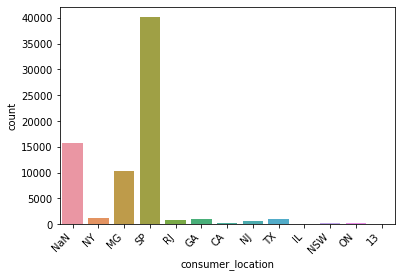

In [13]:
conLoc  =  sns.countplot(x="consumer_location", data=consuTrx.groupby('consumer_location').filter(lambda x: len(x) >100))
conLoc.set_xticklabels(conLoc.get_xticklabels(), rotation=45,horizontalalignment='right')
xticks=conLoc.xaxis.get_major_ticks()
plt.show()

In [14]:
# Keeping 'NaN' values as we dont want to lose data also we see that most of the data is consumed at 'SP'

In [15]:
consuTrx[consuTrx['country'].notna()]['country'].unique()

array(['US', 'BR', 'JP', 'KR', 'IN', 'IE', 'SG', 'DE', 'CA', 'IS', 'AU',
       'ZZ', 'ES', 'CN', 'GB', 'MY', 'AR', 'NL', 'CL', 'IT', 'CO', 'PT',
       'CH'], dtype=object)

In [16]:
consuTrx['country'] = consuTrx['country'].fillna('NaN')

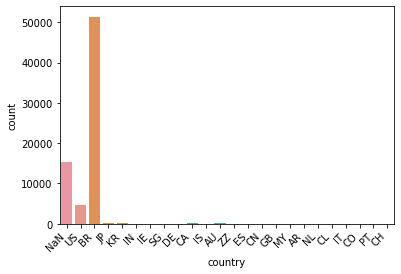

In [17]:
conLoc  =  sns.countplot(x="country", data=consuTrx[['country']])
conLoc.set_xticklabels(conLoc.get_xticklabels(), rotation=45,horizontalalignment='right')
xticks=conLoc.xaxis.get_major_ticks()
plt.show()

 #### ------------------------------------------- Create ratings column -------------------------------------------              

In [18]:
# ratins can be given based on intraction type :  content_followed=5,content_commented_on=4,content_saved=3,content_liked=2 and content_watched=1
consuTrx['interaction_type'].unique()

array(['content_watched', 'content_followed', 'content_saved',
       'content_liked', 'content_commented_on'], dtype=object)

In [19]:
consuTrx.loc[consuTrx['interaction_type'] == 'content_followed', 'rating'] = 5
consuTrx.loc[consuTrx['interaction_type'] == 'content_commented_on', 'rating'] = 4
consuTrx.loc[consuTrx['interaction_type'] == 'content_saved', 'rating'] = 3
consuTrx.loc[consuTrx['interaction_type'] == 'content_liked', 'rating'] = 2
consuTrx.loc[consuTrx['interaction_type'] == 'content_watched', 'rating'] = 1

In [20]:
consuTrx.head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country,rating
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1.0
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,1.0
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,5.0
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN,1.0


In [21]:
## convert -ve item_id and Cunsumer_id in +ve integers

consuTrx['consumer_code'] = consuTrx.consumer_id.astype('category').cat.codes
consuTrx['item_code'] = consuTrx.item_id.astype('category').cat.codes

In [22]:
consuTrx.sort_values(by=['item_code']).head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country,rating,consumer_code,item_code
31165,1465914778,content_watched,-9222795471790223670,1895326251577378793,6308214842927573276,NaN,NaN,NaN,1.0,1142,0
21445,1466479101,content_watched,-9222795471790223670,-5868110530814399805,6952168570162227005,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,13,JP,1.0,333,0
21452,1466479101,content_watched,-9222795471790223670,-5868110530814399805,6952168570162227005,NaN,NaN,NaN,1.0,333,0
31161,1465914310,content_watched,-9222795471790223670,-1032019229384696495,5852254213536064219,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0,831,0
31163,1465914269,content_followed,-9222795471790223670,1895326251577378793,6308214842927573276,NaN,NaN,NaN,5.0,1142,0


In [23]:
# remove columns which are not required
consuTrxForCFilter = consuTrx.drop(["event_timestamp","interaction_type","consumer_session_id","consumer_device_info","consumer_location","country"],axis=1)


In [24]:
consuTrxForCFilter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        72312 non-null  int64  
 1   consumer_id    72312 non-null  int64  
 2   rating         72312 non-null  float64
 3   consumer_code  72312 non-null  int16  
 4   item_code      72312 non-null  int16  
dtypes: float64(1), int16(2), int64(2)
memory usage: 1.9 MB


In [25]:
len(consuTrxForCFilter['consumer_id'].unique())

1895

In [26]:
# Since at end we need to map item code to item id we create the mapping 
#consuTrxForCFilter.info()
consuTrx_for_merge = consuTrxForCFilter.drop(['consumer_id','consumer_code'],axis=1)

#consuTrx_for_merge.info()

original_grouped  = consuTrx_for_merge.groupby(['item_id','item_code'])

original_grouped = original_grouped.max()

original_grouped = original_grouped.reset_index()
original_grouped = original_grouped.drop('rating',axis=1)

original_grouped.head()

,item_id,item_code
0,-9222795471790223670,0
1,-9216926795620865886,1
2,-9194572880052200111,2
3,-9192549002213406534,3
4,-9190737901804729417,4


In [27]:
len(original_grouped)

2987

In [28]:
original_grouped[original_grouped['item_code']==2357]

,item_id,item_code
2357,5338677278233757627,2357


In [29]:
original_grouped[original_grouped['item_id']==5338677278233757627].index[0]


2357

In [30]:
# grouped over users

consumer_for_merge = consuTrxForCFilter.drop(['item_id','item_code','rating'],axis=1)

user_grouped  = consumer_for_merge.groupby(['consumer_id'])

user_grouped = user_grouped.max()

# original_grouped = original_grouped.reset_index()
# original_grouped = original_grouped.drop('rating',axis=1)

user_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, -9223121837663643404 to 9210530975708218054
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   consumer_code  1895 non-null   int16
dtypes: int16(1)
memory usage: 18.5 KB


In [31]:
user_grouped

,consumer_code
consumer_id,
-9223121837663643404,0
-9212075797126931087,1
-9207251133131336884,2
-9199575329909162940,3
-9196668942822132778,4
...,...
9165571805999894845,1890
9187866633451383747,1891
9191849144618614467,1892


In [32]:
user_grouped[user_grouped['consumer_code'] == 1323]

,consumer_code
consumer_id,
3636910968448833585,1323


In [33]:
user_grouped.loc[3636910968448833585].consumer_code

1323

# ----------------- Platform content analysis -------------------

In [34]:
# read platform content csv 
ptfmCont = pd.read_csv("./data/platform_content.csv", error_bad_lines=False)
ptfmCont.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [35]:
ptfmCont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [36]:
ptfmCont['language'].unique()

array(['en', 'pt', 'es', 'la', 'ja'], dtype=object)

In [37]:
# We need to check only for english language so filter the data
ptfmCont = ptfmCont[ptfmCont['language'] == 'en']

In [38]:
ptfmCont['interaction_type'].unique()

array(['content_pulled_out', 'content_present'], dtype=object)

In [39]:
# For recomandation pupose we are only interested in the data available on platform, filtering out content pulled out 
ptfmCont = ptfmCont[ptfmCont['interaction_type'] == 'content_present']



In [40]:
ptfmCont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 1 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       2211 non-null   int64 
 1   interaction_type      2211 non-null   object
 2   item_id               2211 non-null   int64 
 3   producer_id           2211 non-null   int64 
 4   producer_session_id   2211 non-null   int64 
 5   producer_device_info  467 non-null    object
 6   producer_location     467 non-null    object
 7   producer_country      467 non-null    object
 8   item_type             2211 non-null   object
 9   item_url              2211 non-null   object
 10  title                 2211 non-null   object
 11  text_description      2211 non-null   object
 12  language              2211 non-null   object
dtypes: int64(4), object(9)
memory usage: 241.8+ KB


In [41]:
# % of null is column producer_device_info, other similar
(1- 467/2211)*100

78.87833559475351

In [42]:
# dropping these columns
ptfmCont = ptfmCont.drop(["producer_device_info","producer_location","producer_country"],axis=1)

In [43]:
ptfmCont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 1 to 3121
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   event_timestamp      2211 non-null   int64 
 1   interaction_type     2211 non-null   object
 2   item_id              2211 non-null   int64 
 3   producer_id          2211 non-null   int64 
 4   producer_session_id  2211 non-null   int64 
 5   item_type            2211 non-null   object
 6   item_url             2211 non-null   object
 7   title                2211 non-null   object
 8   text_description     2211 non-null   object
 9   language             2211 non-null   object
dtypes: int64(4), object(6)
memory usage: 190.0+ KB


In [44]:
pd.set_option('max_colwidth', 100)

In [45]:
ptfmCont.head(5)

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,item_type,item_url,title,text_description,language
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,HTML,http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transact...,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",All of this work is still very early. The first full public version of the Ethereum software was...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,HTML,http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump,Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump,"The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi...",en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,HTML,https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html,Google Data Center 360° Tour,We're excited to share the Google Data Center 360° Tour - a YouTube 360° video that gives you an...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,HTML,https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology...,"IBM Wants to ""Evolve the Internet"" With Blockchain Technology",The Aite Group projects the blockchain market could be valued at $400 million by 2019. For that ...,en
5,1459194522,content_present,-2826566343807132236,4340306774493623681,8940341205206233829,HTML,http://www.coindesk.com/ieee-blockchain-oxford-cloud-computing/,IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk,One of the largest and oldest organizations for computing professionals will kick off its annual...,en


In [46]:
# remove other columns that will not be used
ptfmCont = ptfmCont.drop(["event_timestamp","producer_session_id"],axis=1)

In [47]:
# Since we already filtered data based on language and now we have only english description
ptfmCont = ptfmCont.drop(["language"],axis=1)



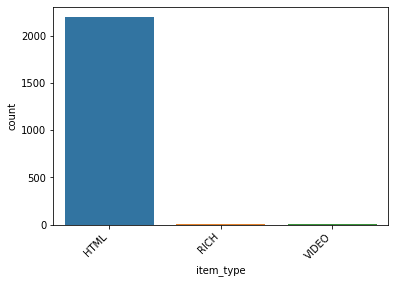

In [48]:
item_typ  =  sns.countplot(x="item_type", data=ptfmCont[['item_type']])
item_typ.set_xticklabels(item_typ.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

In [49]:
# get the domain names from URL 
ptfmCont['item_domain']=ptfmCont['item_url'].str.extract('^(?:https?:\/\/)?(?:[^@\/\n]+@)?(?:www\.)?([^:\/?\n]+)')

In [50]:
ptfmCont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 1 to 3121
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   interaction_type  2211 non-null   object
 1   item_id           2211 non-null   int64 
 2   producer_id       2211 non-null   int64 
 3   item_type         2211 non-null   object
 4   item_url          2211 non-null   object
 5   title             2211 non-null   object
 6   text_description  2211 non-null   object
 7   item_domain       2211 non-null   object
dtypes: int64(2), object(6)
memory usage: 235.5+ KB


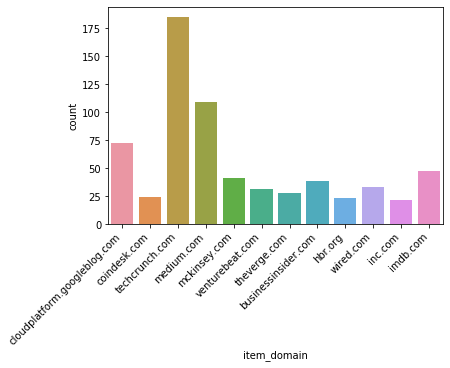

In [51]:
lang  =  sns.countplot(x="item_domain", data=ptfmCont.groupby('item_domain').filter(lambda x: len(x) >20))
lang.set_xticklabels(lang.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()


In [52]:
ptfmContAfterEDA = ptfmCont.copy()

In [53]:
# We will be using this for checking pullled out content and other things
ptfmCont_to_merge = ptfmContAfterEDA[['interaction_type','item_id','title','item_domain','text_description']]

# -------------------- Content-Based Filtering --------------------

In [54]:
pd.set_option('max_colwidth', None)

In [55]:
# Check descriptiom column 
ptfmCont['text_description'].head(1)

1    All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azure.

In [56]:
ptfmCont['text_description'].str.len()

1        6543
2        1993
3        1520
4        8093
5        1824
        ...  
3116     1006
3118     1703
3119    16970
3120     6530
3121      346
Name: text_description, Length: 2211, dtype: int64

In [57]:
# avrage length of test is ~6000 words
np.mean(ptfmCont['text_description'].str.len())

6071.014925373134

In [58]:
# remove the stop words from the description
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document



In [59]:
ptfmCont['text_description'] = ptfmCont['text_description'].apply(lambda x: preprocess(x))

In [60]:
ptfmCont['text_description'].str.len()

1        4951
2        1643
3        1118
4        6048
5        1443
        ...  
3116      828
3118     1338
3119    13821
3120     5204
3121      265
Name: text_description, Length: 2211, dtype: int64

In [61]:
# by preprocessing we reduced the average length of description 
np.mean(ptfmCont['text_description'].str.len())

4552.193125282677

In [62]:
ptfmCont['text_description'].head()

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Generate corpus of words 

In [63]:
#pip install gensim

In [64]:
from gensim.corpora.dictionary import Dictionary

C:\Users\Admin\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [65]:
# get the list of all words 
words_list = []
for keyword in ptfmCont['text_description']:
    splitted_words = word_tokenize(keyword)
    words_list.append(splitted_words)

In [66]:
# We have total items i.e. len of word_list
len(words_list)

2211

In [67]:
# tenth item'description is of lenth
len(words_list[10])

3076

In [68]:
# what is the size of all words in all items 
number_words = 0
for word in words_list:
    number_words = number_words + len(word)

In [69]:

number_words

1582568

In [70]:
# create dictionary of word
dictionary = Dictionary(words_list) 

In [71]:
# unique words in all item 
len(dictionary)

61077

In [72]:
dictionary.get(100)

'depend'

In [73]:
# create corpus using this list of items desciption
corpus = [dictionary.doc2bow(doc) for doc in words_list] 

In [74]:
len(corpus), len(corpus[0]), len(corpus[1])

(2211, 400, 175)

### -------------------- TF-IDF Model & similarity matrix --------------------

In [75]:
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity

In [76]:
# TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. 
# This is done by multiplying two metrics: how many times a word appears in a document, and 
# the inverse document frequency of the word across a set of documents.
tfidf = TfidfModel(corpus)

In [77]:
# The similarity measure used is cosine between two vectors.
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [78]:
def content_tfidf_recommendation(item_id, number_results=5):
    item = ptfmCont.loc[ptfmCont.item_id==item_id] 
    keywords = word_tokenize(item['text_description'].values[0])  
    # get just the keywords string ([0]), and then convert to a list of keywords (.split(',') )
    query_doc = keywords #set the query_doc to the list of keywords
    
    query_doc_bow = dictionary.doc2bow(query_doc) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model where we have tuples
    # of the movie ID and it's tf-idf value for the movie

    similarity_array = sims[query_doc_tfidf] # get the array of similarity values between our movie and every other movie. 
    #So the length is the number of movies we have. To do this, we pass our list of tf-idf tuples to sims.

    similarity_series = pd.Series(similarity_array.tolist(), index=ptfmCont.item_id.values) #Convert to a Series
    recommended_items = similarity_series.sort_values(ascending=False)[1:number_results+1] 
    
    # Create dataframe of recommended ites
    content_recomadations_df = pd.DataFrame(recommended_items)
    content_recomadations_df = content_recomadations_df.reset_index()
    content_recomadations_df.columns = ['item_id', 'score']
    merged_content = pd.merge( content_recomadations_df,ptfmContAfterEDA, on='item_id', how='left')
    
    #get the top matching results, i.e. most similar movies; start from index 1 because every movie is most similar to itself
    
    print("Top Recommended Items along with Similarity Score: ")
    return (merged_content,similarity_series)

### Top 10 items on content based filtering 

In [79]:
top10_content,content_all = content_tfidf_recommendation(-4110354420726924665, number_results=10)

Top Recommended Items along with Similarity Score: 


In [80]:
top10_content

item_id     score interaction_type          producer_id  \
0  3353902017498793780  0.844943  content_present  4340306774493623681   
1  5274322067107287523  0.547449  content_present  4340306774493623681   
2  1485652648052127324  0.535586  content_present  4340306774493623681   
3  3067875254349597654  0.459162  content_present  4340306774493623681   
4 -6713697716910928909  0.451286  content_present  4340306774493623681   
5  8084284001249507595  0.418759  content_present  4340306774493623681   
6  4849766494522371290  0.345580  content_present  4340306774493623681   
7 -2711301039947937868  0.341974  content_present  4340306774493623681   
8 -9171475473795142532  0.310818  content_present  4340306774493623681   
9  1266958185239582088  0.307251  content_present  5660542693104786364   

  item_type  \
0      HTML   
1      HTML   
2      HTML   
3      HTML   
4      HTML   
5      HTML   
6      HTML   
7      HTML   
8      HTML   
9      HTML   

                                                                                                            item_url  \
0                                               https://www.cryptocoinsnews.com/ethereum-rise-growth-new-york-times/   
1                                 http://www.newsbtc.com/2016/04/02/ethereum-bitcoin-market-leaders-not-competitors/   
2                                              http://www.coindesk.com/first-ethereum-startup-funding-investor-says/   
3                                                   http://www.coindesk.com/microsoft-ethereum-3-million-developers/   
4                                          https://blog.ethereum.org/2016/03/30/solidity-available-in-visual-studio/   
5                                                       https://news.bitcoin.com/microsoft-embrace-digital-currency/   
6                              http://bitcoinist.net/cashila-announces-convenient-buy-and-sell-feature-for-ethereum/   
7                                                           http://www.coindesk.com/asia-exchanges-ethereum-trading/   
8  http://www.newsbtc.com/2016/03/30/decentralized-options-exchange-etheropt-uses-automated-ethereum-smart-contract/   
9                                                   http://thefinanser.com/2016/09/are-you-a-bitcoin-denialist.html/   

                                                                                  title  \
0                              The Rise And Growth of Ethereum Gets Mainstream Coverage   
1                           Ethereum and Bitcoin Are Market Leaders But Not Competitors   
2             For Blockchain VCs, the Time for Ethereum Investments Has Come - CoinDesk   
3  Microsoft Adds Ethereum to Windows Platform For Over 3 Million Developers - CoinDesk   
4                                   Solidity Available in Visual Studio - Ethereum Blog   
5                      Microsoft Continues to Embrace Ethereum & Bitcoin - Bitcoin News   
6                        Cashila Announces Convenient Buy and Sell Feature For Ethereum   
7               Eyeing Volume, Asian Exchanges Add Support for Ether Trading - CoinDesk   
8        Decentralized Options Exchange Etheropt Uses Automated Ethereum Smart Contract   
9                                   Are you a bitcoin denialist? - Chris Skinner's blog   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [81]:
seearched_item = ptfmContAfterEDA.loc[ptfmCont.item_id==-4110354420726924665]
#recommended_item = ptfmContAfterEDA.loc[ptfmCont.item_id==3353902017498793780]#

In [82]:
pd.set_option('max_colwidth', 100)

In [83]:
seearched_item

,interaction_type,item_id,producer_id,item_type,item_url,title,text_description,item_domain
1,content_present,-4110354420726924665,4340306774493623681,HTML,http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transact...,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",All of this work is still very early. The first full public version of the Ethereum software was...,nytimes.com


In [84]:
# For hybrid 
content_all_df = pd.DataFrame(content_all)

content_all_df = content_all_df.reset_index()

content_all_df.columns = ['item_id', 'score']

merged_content_all = pd.merge( content_all_df,ptfmContAfterEDA, on='item_id', how='left')



In [85]:
merged_content_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2210
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           2211 non-null   int64  
 1   score             2211 non-null   float64
 2   interaction_type  2211 non-null   object 
 3   producer_id       2211 non-null   int64  
 4   item_type         2211 non-null   object 
 5   item_url          2211 non-null   object 
 6   title             2211 non-null   object 
 7   text_description  2211 non-null   object 
 8   item_domain       2211 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 172.7+ KB


# -------------------- Collaborative Filtering --------------------

## -------------------- Memory-based collaborative filtering --------------------

###  -------------------- User-based collaborative filtering --------------------

In [86]:
# This is based on the simple premise that what a user is more likely to prefer is highly correlated to what the 
# other users similar to him/her have liked in the past.

# To summarise the algorithm of user-based filters:

#     Find users similar to the user u (called the peer users) for whom predictions are to be made using any similarity measure like the correlation coefficient.
#     For each item m that the user has not seen, calculate the weighted average of the ratings given to m by the peer users.
#     Recommend the top n movies to the user u.

In [87]:
# get the data frame previously created 
consuTrxForCFilter.head()

,item_id,consumer_id,rating,consumer_code,item_code
0,-3499919498720038879,-8845298781299428018,1.0,33,933
1,8890720798209849691,-1032019229384696495,1.0,831,2933
2,310515487419366995,-1130272294246983140,1.0,826,1537
3,310515487419366995,344280948527967603,5.0,974,1537
4,-7820640624231356730,-445337111692715325,1.0,887,246


In [88]:
# lets remove item_id and consumer_id for now
consuTrxFinal = consuTrxForCFilter.drop(['item_id','consumer_id'],axis=1)

In [89]:
consuTrxFinal.head()


,rating,consumer_code,item_code
0,1.0,33,933
1,1.0,831,2933
2,1.0,826,1537
3,5.0,974,1537
4,1.0,887,246


In [90]:
consuTrxFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         72312 non-null  float64
 1   consumer_code  72312 non-null  int16  
 2   item_code      72312 non-null  int16  
dtypes: float64(1), int16(2)
memory usage: 847.5 KB


In [91]:
# check ratings for user
consuTrxFinal[(consuTrxFinal['consumer_code']==2)]

,rating,consumer_code,item_code
15851,1.0,2,2715
15852,1.0,2,2715
15883,2.0,2,2715
18109,1.0,2,98
18120,2.0,2,98
23662,1.0,2,1322
33149,2.0,2,785
34093,2.0,2,1
35806,1.0,2,785
37385,1.0,2,1


In [92]:
consuTrxFinal[(consuTrxFinal['consumer_code']==2) & (consuTrxFinal['item_code']==1)]

,rating,consumer_code,item_code
34093,2.0,2,1
37385,1.0,2,1


In [93]:
# user must have intracted and also liked this item. We should provide the higest rating for user-item combination 
consuTrxGrouped = consuTrxFinal.groupby(['consumer_code','item_code'])

#get maximum value of rating for each combination
consuTrx_maxRating = consuTrxGrouped.max()

#consuTrx_maxRating

#resert the index 
consuTrx_maxRating = consuTrx_maxRating.reset_index()

In [94]:
consuTrx_maxRating

,consumer_code,item_code,rating
0,0,65,1.0
1,0,160,1.0
2,0,188,1.0
3,0,196,1.0
4,0,314,1.0
...,...,...,...
40705,1894,2861,5.0
40706,1894,2867,1.0
40707,1894,2922,1.0
40708,1894,2925,1.0


In [95]:
# now check if we have correect rating 
consuTrx_maxRating[(consuTrx_maxRating['consumer_code']==2) & (consuTrx_maxRating['item_code']==1)]

,consumer_code,item_code,rating
48,2,1,2.0


In [96]:
consuTrx_maxRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40710 entries, 0 to 40709
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consumer_code  40710 non-null  int64  
 1   item_code      40710 non-null  int64  
 2   rating         40710 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 954.3 KB


In [97]:
num_users = consuTrx_maxRating.consumer_code.nunique()
num_items = consuTrx_maxRating.item_code.nunique()

In [98]:
num_users

1895

In [99]:
num_items

2987

In [100]:
consuTrx_maxRating[consuTrx_maxRating['consumer_code']==1323]

,consumer_code,item_code,rating
29711,1323,7,2.0
29712,1323,18,5.0
29713,1323,47,1.0
29714,1323,61,1.0
29715,1323,64,1.0
...,...,...,...
30045,1323,2951,2.0
30046,1323,2955,1.0
30047,1323,2959,1.0
30048,1323,2960,1.0


####  ------------------------------   Dividing the dataset into train and test --------------------

In [101]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(consuTrx_maxRating, test_size=0.30, random_state=31)

In [102]:
print(train.shape)
print(test.shape)

(28497, 3)
(12213, 3)


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28497 entries, 29746 to 26640
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consumer_code  28497 non-null  int64  
 1   item_code      28497 non-null  int64  
 2   rating         28497 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 890.5 KB


In [104]:
train.head()

,consumer_code,item_code,rating
29746,1323,298,1.0
18802,861,1403,1.0
14516,708,2189,1.0
5026,226,2001,1.0
32796,1425,1058,1.0


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12213 entries, 32395 to 37292
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consumer_code  12213 non-null  int64  
 1   item_code      12213 non-null  int64  
 2   rating         12213 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 381.7 KB


#### -------------------- Create empty user*item full matrix --------------------

In [106]:
data_matrix_full = np.zeros((num_users, num_items))

In [107]:
data_matrix_full

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### --------------------    Populate values in user*item full matrix    --------------------

In [108]:

# since we already have 0 based consumer_code and item_code
for line in consuTrx_maxRating.itertuples():
    data_matrix_full[line[1], line[2]] = line[3]


In [109]:
data_matrix_full

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
# check if matrix is correctly created 
data_matrix_full[2][1]

2.0

####  -------------------- Create user*item matrix for train data ------------------------

In [111]:
data_matrix_train = np.zeros((num_users, num_items))

In [112]:
data_matrix_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
data_matrix_train.shape  

(1895, 2987)

#### -------------------- Populate values in user*item train matrix --------------------

In [114]:
for line in train.itertuples():
    data_matrix_train[line[1], line[2]] = line[3]

In [115]:
data_matrix_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
# check if matrix is correctly created 
data_matrix_train[1323][298]

1.0

####  -------------------------------- Create user*item matrix for test data  ------------------------------

In [117]:
data_matrix_test = np.zeros((num_users, num_items))
data_matrix_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
data_matrix_test.shape  

(1895, 2987)

#### ------------------------------ Populate values in user*item test matrix -----------------------------

In [119]:
for line in test.itertuples():
    data_matrix_test[line[1], line[2]] = line[3]

In [120]:
data_matrix_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## ------------------------ Similarity Matrices ----------------------

### ------------------------------ User Similarity by pariwise distance --------------------------

In [121]:
from sklearn.metrics.pairwise import pairwise_distances 

In [122]:
user_similarity = 1- pairwise_distances(data_matrix_train, metric='cosine')

In [123]:
user_similarity.shape

(1895, 1895)

### ------------------------------- Item Similarity by pariwise distance -------------------------------

In [124]:
# for item-user matrix we will take the transpose of data_matrix_train
data_matrix_train.T.shape

(2987, 1895)

In [125]:
data_matrix_train.shape

(1895, 2987)

In [126]:
item_similarity = 1-pairwise_distances(data_matrix_train.T, metric='cosine')

In [127]:
item_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.05129892,
        0.11470787],
       [0.        , 0.        , 0.        , ..., 0.05129892, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11470787, 0.        ,
        1.        ]])

## -------------------- Item Prediction using user similarity -------------------------

In [128]:
item_prediction = np.dot(user_similarity, data_matrix_test)

In [129]:
item_prediction

array([[1.06448346, 0.07443229, 0.10229994, ..., 0.37769666, 0.36311942,
        0.        ],
       [0.        , 0.        , 0.01964186, ..., 0.01715996, 0.16556788,
        0.09622504],
       [0.        , 2.55445369, 0.        , ..., 0.        , 0.1477615 ,
        0.        ],
       ...,
       [0.1203919 , 0.43643578, 0.10238691, ..., 0.05067411, 0.1752337 ,
        0.        ],
       [0.3000493 , 0.42640143, 0.03745102, ..., 0.1093659 , 0.29539405,
        0.05802589],
       [0.07904833, 0.        , 0.5475892 , ..., 0.01049804, 0.20492476,
        0.        ]])

In [130]:
item_prediction.shape

(1895, 2987)

In [131]:
prediction_df = pd.DataFrame(item_prediction)

In [132]:
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
0,1.064483,0.074432,0.102300,0.833468,0.070083,0.481707,0.0,0.356882,0.023607,0.113531,...,0.000000,0.093518,0.144056,0.095699,0.178115,0.076208,0.236835,0.377697,0.363119,0.000000
1,0.000000,0.000000,0.019642,0.052385,0.000000,0.136328,0.0,0.088388,0.000000,0.000000,...,0.000000,0.017160,0.017160,0.000000,0.019642,0.014681,0.061085,0.017160,0.165568,0.096225
2,0.000000,2.554454,0.000000,0.036226,0.060746,0.273051,0.0,0.040927,0.000000,0.000000,...,0.244339,0.000000,0.025683,0.000000,0.000000,0.020761,0.000000,0.000000,0.147761,0.000000
3,0.659611,0.081111,0.016137,0.067780,0.000000,0.088631,0.0,0.189182,0.000000,0.061859,...,0.000000,0.044887,0.075634,0.012997,0.000000,0.020761,0.033696,0.076255,0.073320,0.000000
4,0.169516,0.000000,0.128666,0.187669,0.000000,0.119931,0.0,0.000000,0.021693,0.000000,...,0.000000,0.030697,0.030697,0.000000,0.165691,0.039392,0.000000,0.030697,0.039392,0.000000


### ------------------------------------- Predict items for given user --------------------

In [133]:
#1323

In [134]:
original_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   item_id    2987 non-null   int64
 1   item_code  2987 non-null   int64
dtypes: int64(2)
memory usage: 46.8 KB


In [135]:
original_grouped[original_grouped['item_code'] == 1323]

,item_id,item_code
1323,-958925381525830552,1323


In [136]:
original_grouped.shape

(2987, 2)

In [137]:
def recommendItemForUser(consumer_id):
    consumer_code=user_grouped.loc[consumer_id].consumer_code
    prediction_df_user_sorted = pd.DataFrame(prediction_df.iloc[consumer_code].sort_values(ascending=False))
    prediction_df_user_sorted.reset_index(inplace=True)
    prediction_df_user_sorted.columns = ['item_code', 'score']
    df_user = pd.DataFrame(data_matrix_full[consumer_code], columns=['rating_mtx'])
    df_user = df_user.reset_index()
    df_user.columns = ['item_code', 'rating_mtx']
    merged_score = pd.merge( df_user,prediction_df_user_sorted, on='item_code', how='left')
    #Merge recommended items codes with original item ids
    merged_custTxn = pd.merge(merged_score, original_grouped, on=['item_code'],how='left')
    #now since we have item ids we can merge it with platform data , so that we can remove pulled out content
    merged_custTxn_title = pd.merge(merged_custTxn, ptfmCont_to_merge, on='item_id', how='left')
    # remove all the content which is watched by user 
    merged_custTxn_title = merged_custTxn_title.drop(merged_custTxn_title[merged_custTxn_title['rating_mtx']>0].index)
    # remove all the content wching pulled out
    merged_custTxn_title = merged_custTxn_title.drop(merged_custTxn_title[merged_custTxn_title['interaction_type']!='content_present'].index)
    # sort vales based on score
    merged_custTxn_title = merged_custTxn_title.sort_values(by='score',ascending=False)
    return (merged_custTxn_title.head(10),merged_custTxn_title)

### ------------ Top 10 recommandation based on User based collaborative filtering ------------

In [138]:
predForUser, content_user_collb_all = recommendItemForUser(3636910968448833585)

In [139]:
predForUser.shape

(10, 8)

In [140]:
predForUser

,item_code,rating_mtx,score,item_id,interaction_type,title,item_domain,text_description
840,840,0.0,2.865483,-4084394822880420062,content_present,Android Studio 2.2,android-developers.blogspot.com.br,"By Jamal Eason , Product Manager, Android Android Studio 2.2 is available to download today. Pre..."
796,796,0.0,2.864305,-4333957157636611418,content_present,Why Programmers Want Private Offices,business.stackoverflow.com,Ask any of your employees or coworkers what they think makes a workplace attractive and you're b...
1464,1464,0.0,2.602643,-78066964941874046,content_present,Microservices testing,testdetective.com,"Modern software engineering is all about scalability, product delivery time and cross-platform a..."
2900,2900,0.0,2.592456,8729086959762650511,content_present,"What do you mean by ""Event-Driven""?",martinfowler.com,Towards the end of last year I attended a workshop with my colleagues in ThoughtWorks to discuss...
2245,2245,0.0,2.524577,4761910285123871012,content_present,Bot Engine,wit.ai,Today we are releasing the first step of our vision for conversational bots: an early beta of Bo...
1833,1833,0.0,2.428282,2280365999288629014,content_present,The Best Linux Distros of 2016,linux.com,"2015 was a very important year for Linux, both in the enterprise as well as in the consumer spac..."
1140,1140,0.0,2.409319,-2097075598039554565,content_present,"The Languages, Frameworks and Tools You Should Learn in 2017",tutorialzine.com,"The Languages, Frameworks and Tools You Should Learn in 2017 Martin Angelov The software develop..."
263,263,0.0,2.396448,-7681408188643141872,content_present,The End Of Apps As We Know Them - Inside Intercom,blog.intercom.stfi.re,The experience of our primary mobile screen being a bank of app icons that lead to independent d...
1073,1073,0.0,2.356694,-2479936301516183562,content_present,"GitLab launches Issue Boards, an open-source task management tool that resembles Trello",venturebeat.com,"Source code repository software startup GitLab today is introducing Issue Boards, an open-source..."
2434,2434,0.0,2.331725,5854206600849997966,content_present,The hardest thing in computer science,blog.kaczmarzyk.net,I firmly believe that the hardest thing in computer science is naming things . I saw it many tim...


## ------------------------------------ Evaluation ------------------------------------

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [142]:
### Lets compare all the ratings provided by our model  

In [143]:
data_matrix_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
data_matrix_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
item_prediction

array([[1.06448346, 0.07443229, 0.10229994, ..., 0.37769666, 0.36311942,
        0.        ],
       [0.        , 0.        , 0.01964186, ..., 0.01715996, 0.16556788,
        0.09622504],
       [0.        , 2.55445369, 0.        , ..., 0.        , 0.1477615 ,
        0.        ],
       ...,
       [0.1203919 , 0.43643578, 0.10238691, ..., 0.05067411, 0.1752337 ,
        0.        ],
       [0.3000493 , 0.42640143, 0.03745102, ..., 0.1093659 , 0.29539405,
        0.05802589],
       [0.07904833, 0.        , 0.5475892 , ..., 0.01049804, 0.20492476,
        0.        ]])

In [146]:
## RMSE: Root Mean Squared Error
# Root Mean Squared Error (RMSE): RMSE  is typically used to evaluate regression problems where 
# the output (a predicted scalar value) is compared with the true scalar value output for a given data point.

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()]
    ground_truth = ground_truth[ground_truth.nonzero()]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [147]:
rmse(item_prediction, data_matrix_test)

0.9226017619770445

### --------------------------------- Item-Based Collaborative Filtering ---------------------------------

In [148]:
#  In this type of filtering, the relationship between items is explored based on user ratings.

# To reiterate the item-based filtering procedure, the following steps are followed in sequence to predict the rating a user u will give to a movie m:

#     Find items similar to the movie m (often called peer group of items) using a similarity measure like cosine. 
#     Calculate the rating that the user will give to the movie m using the weighted average of the ratings given to the nearest movies by the user.
#     Recommend the top-n movies to the user.

In [149]:
# item similarity that we calculated before 
item_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.05129892,
        0.11470787],
       [0.        , 0.        , 0.        , ..., 0.05129892, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11470787, 0.        ,
        1.        ]])

In [150]:
item_similarity.shape

(2987, 2987)

#### ------------------------------------ User rating Prediction using item similarity ------------------------------------

In [151]:
data_matrix_test.T.shape

(2987, 1895)

In [152]:
user_prediction = np.dot(item_similarity, data_matrix_test.T)

In [153]:
user_prediction.shape

(2987, 1895)

In [154]:
prediction_df = pd.DataFrame(user_prediction)

In [155]:
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894
0,0.179605,0.000000,0.000000,0.963572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.550230,0.0,0.000000,0.000000,0.000000,0.000000,1.091089
1,0.118345,0.382158,2.028989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.587682,0.0,0.000000,0.023783,0.000000,0.000000,0.454754
2,0.299189,0.000000,0.000000,0.000000,0.290909,0.037043,0.633049,0.035411,0.127657,0.170320,...,0.0,0.121746,0.237483,3.441809,0.0,0.606806,0.406970,0.036726,0.080583,1.721898
3,0.450959,0.000000,0.240993,0.045787,0.263824,0.267679,0.591553,2.125127,0.070933,1.657368,...,0.0,0.566809,0.507003,1.988117,0.0,1.106626,0.595966,0.173667,0.271218,3.095620
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060858,0.297722,...,0.0,0.000000,0.000000,0.074125,0.0,0.000000,0.000000,0.000000,0.000000,0.051031


### ------------------------------------- Predict items for given user -------------------------------

In [158]:
def recommendOnItemSimilarity(customer_id):
    consumer_code=user_grouped.loc[customer_id].consumer_code
    recommended_items = pd.DataFrame(prediction_df[consumer_code].sort_values(ascending=False))
    recommended_items.reset_index(inplace=True)
    recommended_items.columns = ['item_code', 'score']
    # Remove allready watched and pulled out content
    df_user = pd.DataFrame(data_matrix_full[consumer_code], columns=['rating_mtx'])
    df_user = df_user.reset_index()
    df_user.columns = ['item_code', 'rating_mtx']
    # Merge rating and score dataframe
    merged_score = pd.merge( df_user,recommended_items, on='item_code', how='left')
    # Merge to get item id for items
    merged_custTxn = pd.merge(merged_score, original_grouped, on=['item_code'],how='left')
    # Merge this df with platform dataframe to get content available
    merged_custTxn_title = pd.merge(merged_custTxn, ptfmCont_to_merge, on='item_id', how='left')
    # remove all the watchec content
    merged_custTxn_title = merged_custTxn_title.drop(merged_custTxn_title[merged_custTxn_title['rating_mtx']>0].index)
    # Remove pulled out content
    merged_custTxn_title = merged_custTxn_title.drop(merged_custTxn_title[merged_custTxn_title['interaction_type']!='content_present'].index)
    # sort values on score
    merged_custTxn_title = merged_custTxn_title.sort_values(by='score',ascending=False)
    return merged_custTxn_title.head(10)


### --------------------- Top 10 recommandation based of collaborative filtering ---------------------

In [159]:
onItem = recommendOnItemSimilarity(3636910968448833585)

In [162]:
onItem[['item_id','title','text_description']]

,item_id,title,text_description
1360,-724699218170106849,Tensorflow wins,Tensorflow wins We started with the development of Leaf briefly before Google released Tensorflo...
2685,7395435905985567130,The AI business landscape,A data-driven analysis of companies that are adopting artificial intelligence. (source: Pexels )...
1577,524776334673868069,Graph-powered Machine Learning at Google,"Recently, there have been significant advances in Machine Learning that enable computer systems ..."
1784,1954074927376897165,"Swarm A.I. Correctly Predicts the Kentucky Derby, Accurately Picking all Four Horses of the Supe...","SAN FRANCISCO, CA--(Marketwired - May 9, 2016) - If you've been following the predictions made b..."
1292,-1137602700803601559,Polly.ai raises $1.2 million to help companies poll their employees,"Makers of Polly, a poll-making bot that is the most popular in the Bot category of the Slack App..."
902,-3697359635590244386,"Google I/O 2016 preview: Android N, Android VR, Project Chirp, Play Store on Chromebooks and more!",What to expect from the biggest Google conference ever. It's Google I/O time! The 2016 installme...
1781,1920899299418335515,AI Revolution 101 - AI Revolution,"AI Revolution 101 Our last invention, greatest nightmare, or pathway to utopia? About This essay..."
731,-4765711818183276269,Google lags behind Amazon and Microsoft's cloud in one important area,Thomson Reuters Google's cloud service may want to spent a lot more on hiring enterprise sales p...
1136,-2118981143119783447,What readers think about computer-generated texts,"Media research München, 05/03/2016 An experimental study carried out by LMU media researchers ha..."
1667,1137471872769164371,Google Calendar for Android can now find meeting times that work for everyone,Google today announced a new feature for its Google Calendar application on Android that should ...


## ------------------------------------ Evaluation ------------------------------------

In [163]:
## RMSE: Root Mean Squared Error
# Root Mean Squared Error (RMSE): RMSE  is typically used to evaluate regression problems where 
# the output (a predicted scalar value) is compared with the true scalar value output for a given data point.


In [164]:
rmse(user_prediction, data_matrix_test.T)

7.16780780674295

# Model-Based Approach
Model-based collaborative filtering algorithms provide item recommendations by first developing a model of user ratings.

The main drawback of the memory-based technique is the requirement of loading a large amount of in-line memory. The problem becomes serious when the rating matrix becomes so huge in a situation that there is an extremely large number of people using the system. A lot of computational resources are consumed and system performance declines, and, thus, the system cannot respond to user requests immediately.  The model-based approach intends to solve such problems.

# ------------------------------ ALS ------------------------------

Alternating least squares (ALS) is a matrix factorization algorithm that separates the user-rating matrix (which you learned about in the previous segment) into two matrices: the user matrix and the item matrix.

In [165]:
consuTrxForCFilter.head()

,item_id,consumer_id,rating,consumer_code,item_code
0,-3499919498720038879,-8845298781299428018,1.0,33,933
1,8890720798209849691,-1032019229384696495,1.0,831,2933
2,310515487419366995,-1130272294246983140,1.0,826,1537
3,310515487419366995,344280948527967603,5.0,974,1537
4,-7820640624231356730,-445337111692715325,1.0,887,246


In [166]:
consuTrxForCFilter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        72312 non-null  int64  
 1   consumer_id    72312 non-null  int64  
 2   rating         72312 non-null  float64
 3   consumer_code  72312 non-null  int16  
 4   item_code      72312 non-null  int16  
dtypes: float64(1), int16(2), int64(2)
memory usage: 1.9 MB


In [167]:
consuTrxForALS = consuTrxForCFilter[['consumer_code','item_code','rating']]

In [168]:
consuTrxForALS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consumer_code  72312 non-null  int16  
 1   item_code      72312 non-null  int16  
 2   rating         72312 non-null  float64
dtypes: float64(1), int16(2)
memory usage: 847.5 KB


In [169]:
consuTrxForALS_grp  = consuTrxForALS.groupby(['consumer_code','item_code'])

consuTrxForALS_grp = consuTrxForALS_grp.max()

consuTrxForALS_grp = consuTrxForALS_grp.reset_index()

consuTrxForALS_grp.head()

,consumer_code,item_code,rating
0,0,65,1.0
1,0,160,1.0
2,0,188,1.0
3,0,196,1.0
4,0,314,1.0


In [170]:
consuTrxForALS_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40710 entries, 0 to 40709
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   consumer_code  40710 non-null  int64  
 1   item_code      40710 non-null  int64  
 2   rating         40710 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 954.3 KB


In [171]:
consuTrxForALS_grp['consumer_code'].nunique()

1895

In [172]:
consuTrxForALS_grp['item_code'].nunique()

2987

In [173]:
consuTrxForALS_grp.shape[0]

40710

## -------------------- Create Sparse User-Item Matrix --------------------

In [174]:
from scipy.sparse import csr_matrix

In [175]:
alpha = 40

In [176]:
sparse_user_item = csr_matrix( ([alpha]*consuTrxForALS.shape[0], (consuTrxForALS['consumer_code'], consuTrxForALS['item_code']) ))

In [177]:
sparse_user_item

<1895x2987 sparse matrix of type '<class 'numpy.intc'>'
	with 40710 stored elements in Compressed Sparse Row format>

In [178]:
sparse_user_item.shape

(1895, 2987)

In [179]:
csr_user_array = sparse_user_item.toarray()

In [180]:
csr_user_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [181]:
len(csr_user_array), len(csr_user_array[0]), csr_user_array[2][1]

(1895, 2987, 80)

In [182]:
print(sparse_user_item)

  (0, 65)	40
  (0, 160)	40
  (0, 188)	40
  (0, 196)	40
  (0, 314)	320
  (0, 328)	40
  (0, 386)	40
  (0, 417)	40
  (0, 443)	40
  (0, 451)	80
  (0, 453)	80
  (0, 465)	40
  (0, 570)	40
  (0, 702)	80
  (0, 769)	40
  (0, 813)	40
  (0, 819)	80
  (0, 864)	40
  (0, 890)	40
  (0, 1087)	80
  (0, 1358)	40
  (0, 1390)	80
  (0, 1411)	120
  (0, 1618)	40
  (0, 1632)	40
  :	:
  (1894, 1977)	160
  (1894, 2023)	40
  (1894, 2027)	40
  (1894, 2071)	640
  (1894, 2080)	80
  (1894, 2190)	40
  (1894, 2253)	80
  (1894, 2334)	40
  (1894, 2349)	40
  (1894, 2451)	40
  (1894, 2470)	40
  (1894, 2538)	80
  (1894, 2608)	40
  (1894, 2676)	80
  (1894, 2696)	120
  (1894, 2719)	40
  (1894, 2772)	80
  (1894, 2809)	40
  (1894, 2814)	80
  (1894, 2845)	40
  (1894, 2861)	160
  (1894, 2867)	40
  (1894, 2922)	40
  (1894, 2925)	40
  (1894, 2981)	40


### -------------------------------- Create item-user sparse matrix -------------------------------

In [183]:
sparse_item_user = sparse_user_item.T.tocsr()

In [184]:
sparse_item_user.shape

(2987, 1895)

In [185]:
csr_item_array = sparse_item_user.toarray()

In [186]:
csr_item_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [187]:
print(sparse_item_user)

  (0, 226)	40
  (0, 333)	280
  (0, 831)	280
  (0, 1142)	320
  (0, 1867)	120
  (1, 2)	80
  (1, 130)	40
  (1, 210)	120
  (1, 555)	40
  (1, 941)	40
  (1, 946)	120
  (1, 1149)	120
  (1, 1235)	200
  (1, 1499)	40
  (1, 1532)	40
  (2, 40)	40
  (2, 159)	40
  (2, 197)	40
  (2, 334)	40
  (2, 630)	40
  (2, 651)	40
  (2, 820)	160
  (2, 906)	40
  (2, 935)	120
  (2, 1004)	40
  :	:
  (2985, 798)	40
  (2985, 908)	40
  (2985, 978)	40
  (2985, 1079)	40
  (2985, 1136)	40
  (2985, 1221)	40
  (2985, 1248)	40
  (2985, 1263)	160
  (2985, 1319)	40
  (2985, 1334)	40
  (2985, 1343)	40
  (2985, 1383)	80
  (2985, 1404)	120
  (2985, 1405)	40
  (2985, 1527)	40
  (2985, 1597)	40
  (2985, 1728)	240
  (2985, 1833)	120
  (2985, 1874)	40
  (2985, 1888)	80
  (2986, 170)	40
  (2986, 588)	40
  (2986, 1004)	40
  (2986, 1237)	40
  (2986, 1597)	40


## -------------------- Create train, test data --------------------

In [188]:
from implicit.evaluation import train_test_split

In [189]:
train, test = train_test_split(sparse_item_user, train_percentage=0.8)

In [190]:
train

<2987x1895 sparse matrix of type '<class 'numpy.intc'>'
	with 32585 stored elements in Compressed Sparse Row format>

In [191]:
test

<2987x1895 sparse matrix of type '<class 'numpy.intc'>'
	with 8125 stored elements in Compressed Sparse Row format>

In [192]:
test

<2987x1895 sparse matrix of type '<class 'numpy.intc'>'
	with 8125 stored elements in Compressed Sparse Row format>

## -------------------- Building ALS Model --------------------

In [193]:
#! pip install implicit

In [194]:
import implicit

In [195]:
model = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20, calculate_training_loss=True)


In [196]:
model

### ------------------------- Train the Model -----------------------

In [197]:
model.fit(train, show_progress=True)

## ---------------- Generating recommendations for a user_id --------------------

In [213]:
def remommendALS(customer_id):
    consumer_code=user_grouped.loc[customer_id].consumer_code
    output_30 = model.recommend(consumer_code, sparse_user_item, N=30)
    output_df = pd.DataFrame(output_30, columns=['item_code', 'als_score'])
    # Merge recomended data to get item_id
    merged_ALS = pd.merge(output_df, original_grouped, on=['item_code'],how='left')
    # Merge with platform content to remove pulled out content
    merged_ALS_title = pd.merge(merged_ALS, ptfmCont_to_merge, on='item_id', how='left')
    # remove content that is pulled out
    merged_ALS_title = merged_ALS_title[merged_ALS_title['interaction_type'] == 'content_present']
    # sort values on score
    #merged_ALS_title = merged_ALS_title.sort_values(by='als_score',ascending=False)
    return merged_ALS_title[:10]

## --------------- Top 10 recommandation from ALS ---------------

In [226]:
als_top10 = remommendALS(3636910968448833585)

In [228]:
als_top10[['item_id','title','text_description']]

,item_id,title,text_description
1,1873952032843878490,Hype Driven Development,Software development teams often make decisions about software architecture or technological sta...
2,5338677278233757627,How to Get a Job at Google,"MOUNTAIN VIEW, Calif. - LAST June, in an interview with Adam Bryant of The Times, Laszlo Bock, t..."
3,-2479936301516183562,"GitLab launches Issue Boards, an open-source task management tool that resembles Trello","Source code repository software startup GitLab today is introducing Issue Boards, an open-source..."
4,-4338308747999225618,How the queen of Silicon Valley is helping Google go after Amazon's most profitable business,"Google The first thing to understand about Diane Greene, the woman Google acqui-hired in Novembe..."
6,5533752987392101383,7 Questions to Ask Before Your Next Digital Transformation,"Although digital investment is almost unquestionably the right course of action for most firms, ..."
7,-8277924497842156608,GitHub on BigQuery: Analyze all the open source code,"Google, in collaboration with GitHub, is releasing an incredible new open dataset on Google BigQ..."
9,-1483274517395674620,Test and deploy to Google App Engine with the new Maven and Gradle plugins,"Here at Google, we strive to make it easy for developers to use Google Cloud Platform (GCP). Tod..."
10,-8992803137960175254,4 Reasons Managers Should Spend More Time on Coaching,There are managers who coach and managers who don't. Leaders in the latter category are not nece...
11,1286723199785027310,The Skills You'll Need and the Salary You Can Expect as a Data Scientist,"Data science is a growing career field that pays well. If you are interested in programming, mat..."
12,-8717945432162716060,7 Vital SEO Trends for Google Rankings in 2017 | Digital Current,Use these seven SEO trends to improve your Google search rankings in 2017. Let's face it: Develo...


## ---------------- Generating recommendations for given item_id -----------------

In [230]:
def recommendSimilarItemsALS(item_id):
    item_code = original_grouped[original_grouped['item_id']==item_id].index[0]
    similar = model.similar_items(item_code, 20)
    similar_df = pd.DataFrame(similar, columns=['item_code', 'score'])
    # merge to get item_id
    merged_ALS_item = pd.merge(similar_df, original_grouped, on=['item_code'],how='left')
    # get item titles and description 
    merged_ALS_similar_title = pd.merge(merged_ALS_item, ptfmCont_to_merge, on='item_id', how='left')
    # remove content that is pulled out
    merged_ALS_similar_title = merged_ALS_similar_title[merged_ALS_similar_title['interaction_type'] == 'content_present']
    # drop the item for which we searhced
    merged_ALS_similar_title = merged_ALS_similar_title[merged_ALS_similar_title['item_code'] != item_code]
    return merged_ALS_similar_title[:10]

## ------------- Top 10 similar items based on ALS ---------------

In [233]:
# Recommandation based on item clicked by user
topAls = recommendSimilarItemsALS(5338677278233757627)

In [235]:
topAls[['item_id','title','text_description']]

,item_id,title,text_description
1,-4754223659064624252,Effective learning through code workshops | Box Blog,"At Box, we're very interested in the quality of our code, which is why we're constantly evaluati..."
2,8522523292310933696,Coca-Cola Is Paying $575 Million for Unilever's Soy Drink Business,Coca-Cola and its largest bottler have agreed to acquire a soy-based beverage maker for $575 mil...
3,-8194774279664546436,Linking the customer experience to value,Many customer-experience transformations stall because leaders can't show how these efforts crea...
4,3151804887212279872,Manhattan CRE prices spark a mass exodus of startups to Brooklyn,"Manhattan, once the mecca for technology and innovation on the east coast, is now losing ground ..."
5,8881733945001664941,Configuring OSGi,"For run mode specific configurations, multiple run modes can be combined. For example, you can c..."
6,6765368095966422513,What is Affective Computing And How Could Emotional Machines Change Our Lives?,"12,923 Views How would your computer respond if you looked frustrated or upset? Could your phone..."
8,-5170198873410718233,NTT to buy Dell's services division for $3.05 billion,"You may know Dell as a computer and server maker, but Dell also operates a substantial IT servic..."
9,549631724393582960,Optimize Your Agile Growth Strategy with Cloud,"It was Thomas Edison who said, ""Genius is 1% inspiration and 99% perspiration."" As a man with ov..."
10,-4239579488204604851,Announcing pricing for Google Stackdriver,"We recently announced beta availability of Google Stackdriver , an integrated monitoring, loggin..."
11,-6993279786012379694,Everything you need to know about the big changes coming to Newark airport,"In the fall, thefederal government will lift the cap on the number of hourly takeoffs and landin..."


# -------------------- Evaluate ALS -----------------------

In [236]:
from implicit.evaluation import ranking_metrics_at_k

In [237]:
# Looking at the implicit code i came up with this evaluation metrics and it provides pricision@k,map,auc,etcc
ranking_metrics_at_k(model,train.T,test.T)

{'precision': 0.12707398008979115,
 'map': 0.06191045321251344,
 'ndcg': 0.1039180975548511,
 'auc': 0.5650835823453499}

# ----------- Hybrid : Collaborative + content based ---------------

### Collaborative user based data

In [238]:
predForUser, content_user_collb_all = recommendItemForUser(3636910968448833585)

In [239]:
collab_output_for_hybrid = content_user_collb_all[['item_id','title','score']]

In [240]:
collab_output_for_hybrid.head()

,item_id,title,score
798,-4320251915347436672,Trooly is using machine learning to judge trustworthiness from digital footprints,22.602103
831,-4130193294870737688,Game of Loans,18.461753
858,-3951274083288934897,Digital Leadership Is Not an Optional Part of Being a CEO,14.305706
1319,-986193709330758766,System Code Geeks are giving away a FREE Sublime Text Editor License,13.848119
926,-3544655814153481738,New Africa Trend Briefing from TrendWatching | THE FUTURE OF AFRICONNECTION,11.356745


In [241]:
collab_output_for_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 798 to 2986
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  1879 non-null   int64  
 1   title    1879 non-null   object 
 2   score    1176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB


In [242]:
collab_output_for_hybrid['collaborative_score_normalized'] = (collab_output_for_hybrid['score']-min(collab_output_for_hybrid['score']))/(max(collab_output_for_hybrid['score'])-min(collab_output_for_hybrid['score']))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
collab_output_for_hybrid.head()

,item_id,title,score,collaborative_score_normalized
798,-4320251915347436672,Trooly is using machine learning to judge trustworthiness from digital footprints,22.602103,1.000000
831,-4130193294870737688,Game of Loans,18.461753,0.816816
858,-3951274083288934897,Digital Leadership Is Not an Optional Part of Being a CEO,14.305706,0.632937
1319,-986193709330758766,System Code Geeks are giving away a FREE Sublime Text Editor License,13.848119,0.612692
926,-3544655814153481738,New Africa Trend Briefing from TrendWatching | THE FUTURE OF AFRICONNECTION,11.356745,0.502464


### -------------------- Content based data with score --------------------

In [244]:
# Dataframe of contet based
merged_content_all.head()

,item_id,score,interaction_type,producer_id,item_type,item_url,title,text_description,item_domain
0,-4110354420726924665,1.000000,content_present,4340306774493623681,HTML,http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transact...,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",All of this work is still very early. The first full public version of the Ethereum software was...,nytimes.com
1,-7292285110016212249,0.022316,content_present,4340306774493623681,HTML,http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump,Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump,"The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi...",cointelegraph.com
2,-6151852268067518688,0.011867,content_present,3891637997717104548,HTML,https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html,Google Data Center 360° Tour,We're excited to share the Google Data Center 360° Tour - a YouTube 360° video that gives you an...,cloudplatform.googleblog.com
3,2448026894306402386,0.193428,content_present,4340306774493623681,HTML,https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology...,"IBM Wants to ""Evolve the Internet"" With Blockchain Technology",The Aite Group projects the blockchain market could be valued at $400 million by 2019. For that ...,bitcoinmagazine.com
4,-2826566343807132236,0.080382,content_present,4340306774493623681,HTML,http://www.coindesk.com/ieee-blockchain-oxford-cloud-computing/,IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk,One of the largest and oldest organizations for computing professionals will kick off its annual...,coindesk.com


In [245]:
content_df = merged_content_all[['item_id','title','score',]]

In [246]:
content_df

,item_id,title,score
0,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",1.000000
1,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump,0.022316
2,-6151852268067518688,Google Data Center 360° Tour,0.011867
3,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockchain Technology",0.193428
4,-2826566343807132236,IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk,0.080382
...,...,...,...
2206,4675505028897335428,Swift Top 10 Articles For The Past Year (v.2017),0.005957
2207,-3295913657316686039,Amazon takes on Skype and GoToMeeting with its Chime video conferencing app,0.015825
2208,3618271604906293310,Code.org 2016 Annual Report,0.034200
2209,6607431762270322325,"JPMorgan Software Does in Seconds What Took Lawyers 360,000 Hours",0.060572


In [247]:
# Normalize content based score
content_df['content_score_normalized'] = (content_df['score']-min(content_df['score'])) / (max(content_df['score']) - min(content_df['score']))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## -------------------- Hybrid: Combine two Models --------------------

In [251]:
hybrid_output = pd.merge(collab_output_for_hybrid,content_df, how='left', on='item_id')

In [252]:
hybrid_output.head()

,item_id,title_x,score_x,collaborative_score_normalized,title_y,score_y,content_score_normalized
0,-4320251915347436672,Trooly is using machine learning to judge trustworthiness from digital footprints,22.602103,1.000000,Trooly is using machine learning to judge trustworthiness from digital footprints,0.028578,0.028353
1,-4130193294870737688,Game of Loans,18.461753,0.816816,Game of Loans,0.014538,0.014309
2,-3951274083288934897,Digital Leadership Is Not an Optional Part of Being a CEO,14.305706,0.632937,Digital Leadership Is Not an Optional Part of Being a CEO,0.025116,0.024890
3,-986193709330758766,System Code Geeks are giving away a FREE Sublime Text Editor License,13.848119,0.612692,System Code Geeks are giving away a FREE Sublime Text Editor License,0.006765,0.006534
4,-3544655814153481738,New Africa Trend Briefing from TrendWatching | THE FUTURE OF AFRICONNECTION,11.356745,0.502464,New Africa Trend Briefing from TrendWatching | THE FUTURE OF AFRICONNECTION,0.015627,0.015398


In [253]:
hybrid_output['final_score'] = (hybrid_output['collaborative_score_normalized'] + hybrid_output['content_score_normalized'])/2

In [254]:
hybrid_output = hybrid_output[['title_x','final_score','item_id']]

In [255]:
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title_x,final_score,item_id
0,Trooly is using machine learning to judge trustworthiness from digital footprints,0.514176,-4320251915347436672
550,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",0.502387,-4110354420726924665
1,Game of Loans,0.415562,-4130193294870737688
2,Digital Leadership Is Not an Optional Part of Being a CEO,0.328913,-3951274083288934897
3,System Code Geeks are giving away a FREE Sublime Text Editor License,0.309613,-986193709330758766
793,"For Blockchain VCs, the Time for Ethereum Investments Has Come - CoinDesk",0.267739,1485652648052127324
4,New Africa Trend Briefing from TrendWatching | THE FUTURE OF AFRICONNECTION,0.258931,-3544655814153481738
193,Solidity Available in Visual Studio - Ethereum Blog,0.240011,-6713697716910928909
5,Research at Google,0.233613,-5679427141235752819
6,Farmers Demand Right to Fix Their Own Dang Tractors - Modern Farmer,0.230929,-2929967869758467182


## Other Type of offline evaluation techniques


In [ ]:
#     Mean Absolute Error (MAE)
#     Root Mean Square Error (RMSE)
#     Hit Rate (HR)
#     Average Reciprocal Hit Rate (ARHR)
#     Cumulative Hit Rate (cHR)
#     Rating Hit Rate (rHR)
#     Coverage
#     Diversity
#     Novelty
#     Churn
#     Responsiveness
# 